 I have been always fascinated by the idea of **A/B Testing** and the amount of impact it can bring in businesses. The tutorial is very definitive and Matt has explained each and every step in the tutorial. He has detailed about each and every decision taken while developing the solution.

Even though the tutorial is written in `R`, I was able to scram through his code and my knowledge of Data Science helped me to understand the concepts very quickly. I will have to thank Matt for putting together all the key ingredients of the Data Science world and or using them to solve a real problem.  

I decided to replicate the solution in `Python` and I was able to do it. However, there are some minor differences in my implementation but those can be ignored, I think. Apart from cell annotations, I have not detailed any of the steps because, for that, you really should follow the article I mentioned.

## Data loading

In [1]:
import pandas as pd

control_data = pd.read_csv('control_data.csv')
experiment_data = pd.read_csv('experiment_data.csv')

In [2]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


## Number summaries and basic investigations

In [4]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [5]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
control_data.isna().sum()

,0
Date,0
Pageviews,0
Clicks,0
Enrollments,14
Payments,14


In [7]:
experiment_data.isna().sum()

,0
Date,0
Pageviews,0
Clicks,0
Enrollments,14
Payments,14


In [8]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


## Data wrangling

In [9]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
20,"Fri, Oct 31",8715,722,182.0,123.0
25,"Wed, Nov 5",9633,808,NaN,NaN
4,"Wed, Oct 15",10014,837,163.0,64.0
11,"Wed, Oct 22",9737,801,128.0,70.0
34,"Fri, Nov 14",9304,770,NaN,NaN
7,"Sat, Oct 18",7434,632,110.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
19,"Thu, Oct 30",9308,728,207.0,67.0
0,"Sat, Oct 11",7716,686,105.0,34.0
27,"Fri, Nov 7",9272,767,NaN,NaN


In [10]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [11]:
# Check the new data
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [12]:
# Reorder the columns
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [14]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [15]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [16]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


## Helper functions
- Function for printing the evaluation scores related to a _regression_ problem
- Function for plotting the original values and values predicted by the model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

## Linear regression: A baseline

In [19]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [20]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [21]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039848
R2_Squared: 0.050950018270393915
MAE Score: 19.5860618387751


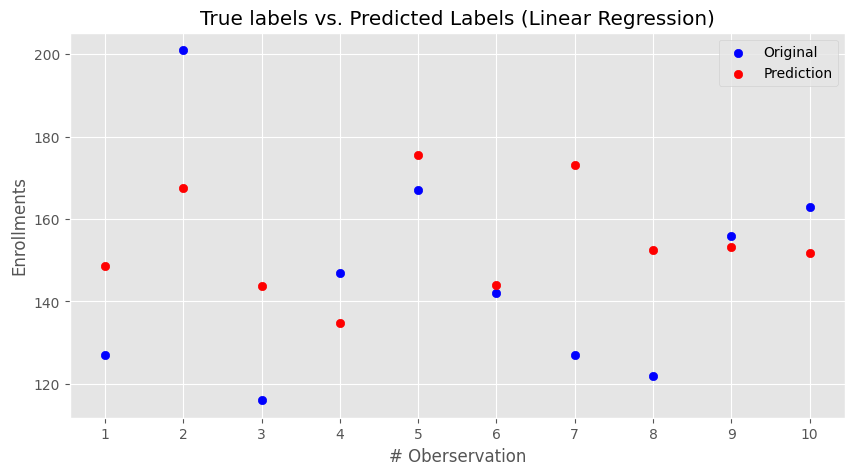

In [22]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [23]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                    7.92e-27
Time:                        11:46:53   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


## Model 02: Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


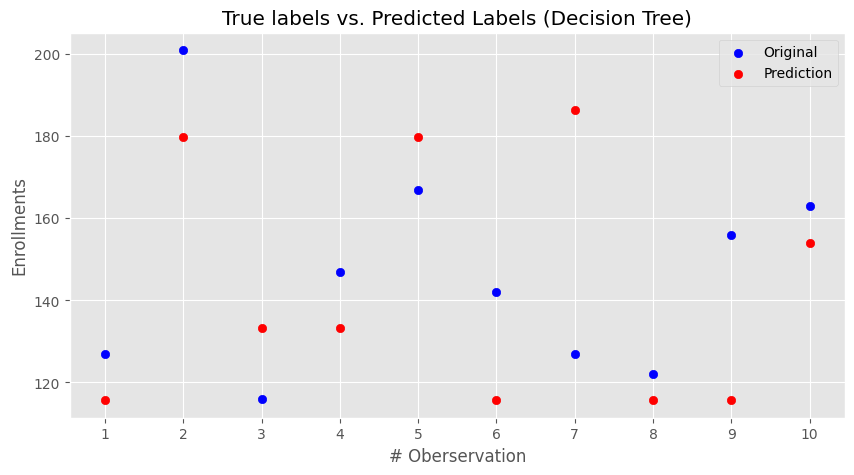

In [26]:
plot_preds(y_test, y_preds, 'Decision Tree')

## Decision tree visualization

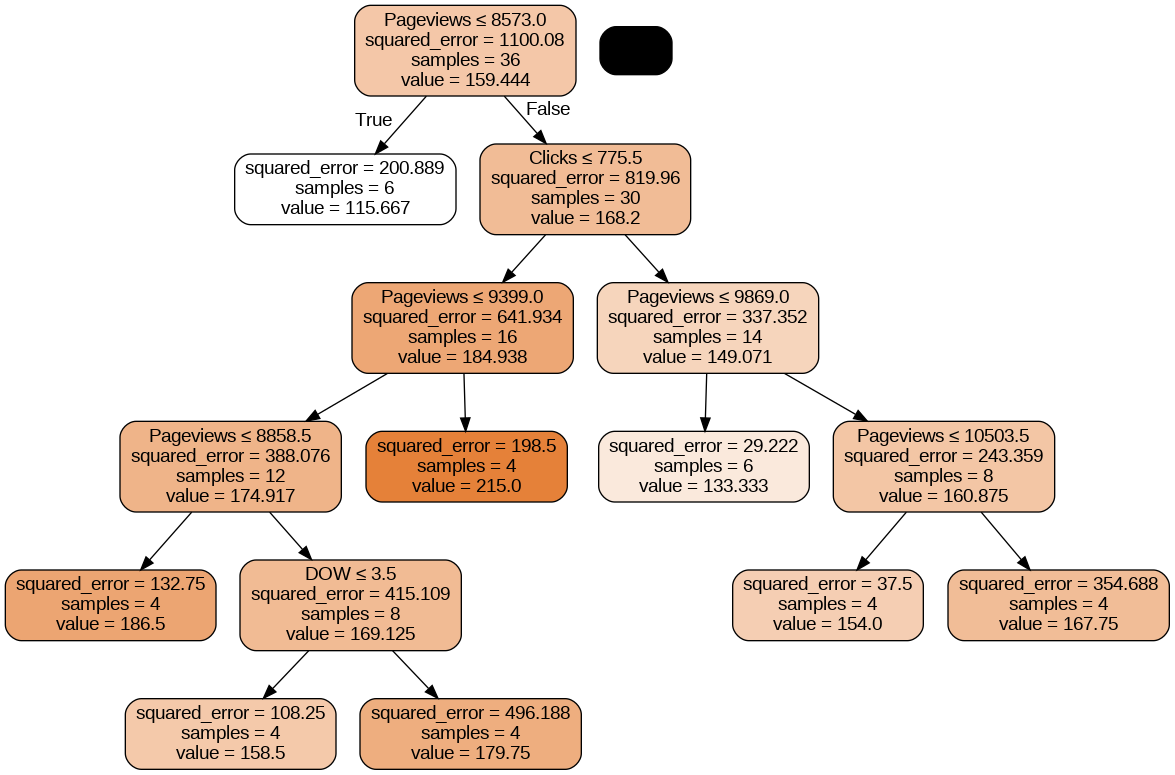

In [27]:
from io import StringIO  # Use the built-in io module instead of sklearn.externals.six
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Model 03: `XGBoost`

In [28]:
import xgboost as xgb

In [29]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [30]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [31]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [32]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:46:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:46:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "gamma", "max_depth", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
calculate_metrics(y_test, y_preds)

RMSE Score: 29.942963328732734
R2_Squared: -0.47862829491693626
MAE Score: 25.682369995117188


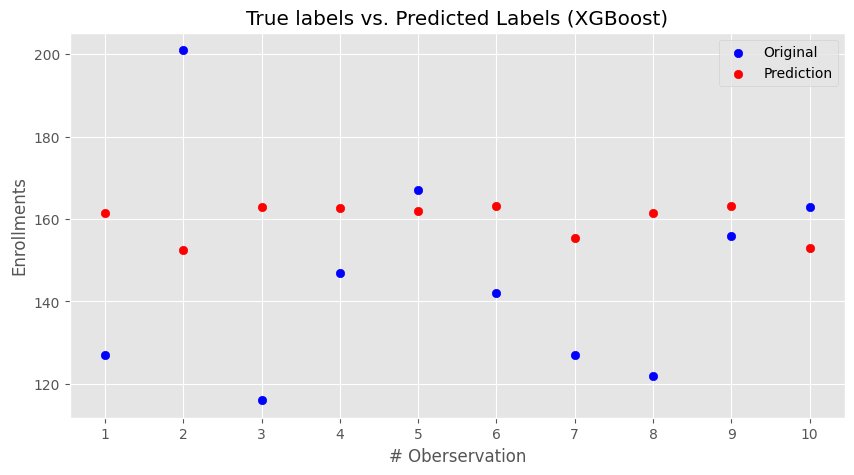

In [34]:
plot_preds(y_test, y_preds, 'XGBoost')

> I used a `gblinear` booster for XGBoost and XGBoost currently does support feature importances linear models.

## Model 04: H2O.ai's AutoML

In [35]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375569 sha256=d483f4c380f3062cab05d797d0fb9b00ca9d2a910a6454ce609dadfa0de7fcdf
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj7hkpu0d
  JVM stdout: /tmp/tmpj7hkpu0d/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj7hkpu0d/h2o_unknownUser_started

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_qi85t3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


> To use h2o.ai's utilities on the dataset, the library requires the data to be in **H2OFrame** format.

In [36]:
X_train['Enrollments'] = y_train
X_test['Enrollments'] = y_test

In [37]:
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [38]:
features = X_train.columns.values.tolist()
target = "Enrollments"

In [39]:
# Construct the AutoML pipeline
auto_h2o = H2OAutoML()
# Train
auto_h2o.train(x=features,
               y=target,
               training_frame=X_train_h2o)

AutoML progress: |█
11:48:00.691: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 36.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240824_114753_model_34


Status of Neuron Layers: predicting Enrollments, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.6 KB, 360,360 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate            rate_rms             momentum    mean_weight           weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  -------------------  -------------------  ----------  --------------------  ------------------  -------------------  -----------------------
    1        5        Input             15.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.06410918296850286  0.18417096138000488  0.0         0.02755986320087686   0.5151770114898682  -0.3477326034924737  0.43202757835388184
    3        1        Linear                       0.0   0.0   0.03149915594258346  0.07481330633163452  0.0         0.030883453656279015  0.7946019172668457  -1.5250289378638686  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 127.9165774094726
RMSE: 11.3100211056157
MAE: 8.380239534840387
RMSLE: 0.08715738309947173
Mean Residual Deviance: 127.9165774094726

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 364.04375892678564
RMSE: 19.07993078936047
MAE: 16.535834047177968
RMSLE: 0.1179409310033286
Mean Residual Deviance: 364.04375892678564

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     16.3922   4.43175    21.5625       9.75993       18.2055       14.7177       17.7155
mean_residual_deviance  359.029   146.703    539.578       142.153       393.637       308.629       411.146
mse                     359.029   146.703    539.578       142.153       393.637       308.629       411.146
r2                      0.550142  0.28021    0.731685      0.813077      0.103873      0.470971      0.631104
residual_deviance       359.029   146.703    539.578       142.153       393.637       308.629       411.146
rmse                    18.5673   4.22554    23.2288       11.9228       19.8403       17.5678       20.2767
rmsle                   0.114991  0.0244892  0.14548       0.0775699     0.121235      0.111479      0.119193

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-08-24 12:02:33  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-08-24 12:02:33  9 min 22.363 sec  15000 obs/sec     10        1             360        25.6558          658.222              21.251          0.40166
    2024-08-24 12:02:38  9 min 27.367 sec  60023 obs/sec     8380      838           301680     14.8479          220.46               11.4607         0.799597
    2024-08-24 12:02:39  9 min 28.108 sec  62497 obs/sec     10010     1001          360360     11.31            127.917              8.38024         0.883721

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
Pageviews   1                      1             

In [40]:
# Overview of how the models performed
auto_h2o.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240824_114753_model_34,19.0799,364.044,16.5358,0.117941,364.044
StackedEnsemble_BestOfFamily_6_AutoML_1_20240824_114753,19.5397,381.799,16.3349,0.120901,381.799
StackedEnsemble_BestOfFamily_7_AutoML_1_20240824_114753,20.2671,410.757,16.788,0.125366,410.757
StackedEnsemble_BestOfFamily_4_AutoML_1_20240824_114753,20.92,437.647,17.3834,0.132757,437.647
GBM_grid_1_AutoML_1_20240824_114753_model_39,20.9836,440.311,17.3801,0.132066,440.311
XGBoost_grid_1_AutoML_1_20240824_114753_model_98,21.4639,460.701,17.5224,0.135222,460.701
XGBoost_grid_1_AutoML_1_20240824_114753_model_61,21.561,464.878,17.5577,0.135492,464.878
DeepLearning_grid_3_AutoML_1_20240824_114753_model_6,21.5781,465.614,18.197,0.12898,465.614
XGBoost_grid_1_AutoML_1_20240824_114753_model_6,21.5998,466.552,17.5477,0.135464,466.552
GBM_grid_1_AutoML_1_20240824_114753_model_219,21.6556,468.963,17.2316,0.132687,468.963


In [41]:
# Extract the best model from the leaderboard
auto_h2o = auto_h2o.leader

In [42]:
X_test_temp = X_test.copy()
del X_test_temp['Enrollments']

In [43]:
# Employing the model to make inference
X_test_h2o_copy = h2o.H2OFrame(X_test_temp)
y_preds = auto_h2o.predict(X_test_h2o_copy)

# Convert the predictions to a native list
y_preds = h2o.as_list(y_preds["predict"])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [44]:
calculate_metrics(y_test, y_preds)

RMSE Score: 31.605751507691156
R2_Squared: -0.6474100012631472
MAE Score: 25.352810590429673


> **XGBoost Still Wins!**